<a href="https://colab.research.google.com/github/raphaFanti/PCA-and-KMeans-for-genetic-code/blob/master/PCA_and_K_means_for_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

placeholder for future context and objectives

# Importing the source file 

In [ ]:
# we open the file and get an array of its lines 
with open ("ccrescentus.fa", "r") as inputFile:
    data = inputFile.readlines()

# we concatenate each line from the second (first line is a description), stripped of empty chars 
geneticCode = ''
for line in data[1:]:
    geneticCode += line.strip()
    
# we count the presence of each genome
aCount = geneticCode.count('a')
gCount = geneticCode.count('g')
tCount = geneticCode.count('t')
cCount = geneticCode.count('c')

print(geneticCode[0:30])
print('Test: only a,g,t,c ?')
print(aCount + gCount + tCount + cCount == len(geneticCode))

gccgatagcctatgatccccggcaggcccg
Test: only a,g,t,c ?
True


# Creating frequency tables

Ok, now we've got a string element containing the sequence. The next step is to separate it into smaller sub-strings and create frequency tables for each x-sized word. We start by separating the string into a number of sub-strings, of a reasonable sample size, to become rows on our table

In [ ]:
# size of the sub strings (data points)
size = 300

dataPoints = []

#We copy the entire code into a string, which will removed of its first elements iteratively
tempString = geneticCode

while len(tempString) > 0:
    dataPoints.append(tempString[0:size])
    tempString = tempString[size:]

print(dataPoints[0])

gccgatagcctatgatccccggcaggcccggggcttggagccgtctggtttggatggaaccctccaaaccagatcaagaggctcctagaacgccgcccgcagggtcacgccccaggtgcgcgggtcgcccggctggccggcgatcaggccggtgttgctgggacccacggccagttgctcgaaatagttctcgtcgaaggcgttgcggacccaggcatagaggttcagcccctcaggcgtgcggaagccggcccggaagttagcgatcgtgtagccgtcaacccaggtgtagatcgaggg


Now we create a list with the combinations of genomes, or words possible 

In [ ]:
import itertools

iterables = ['a','g','t','c']
wordsDict =  {}

for i in range(1,5):
    words = []
    iterator = itertools.product(iterables, repeat = i)
    for word in iterator:
        s = ''
        for t in word:
            s += t
        words.append(s)
    wordsDict[i] = words

print(wordsDict[3])

['aaa', 'aag', 'aat', 'aac', 'aga', 'agg', 'agt', 'agc', 'ata', 'atg', 'att', 'atc', 'aca', 'acg', 'act', 'acc', 'gaa', 'gag', 'gat', 'gac', 'gga', 'ggg', 'ggt', 'ggc', 'gta', 'gtg', 'gtt', 'gtc', 'gca', 'gcg', 'gct', 'gcc', 'taa', 'tag', 'tat', 'tac', 'tga', 'tgg', 'tgt', 'tgc', 'tta', 'ttg', 'ttt', 'ttc', 'tca', 'tcg', 'tct', 'tcc', 'caa', 'cag', 'cat', 'cac', 'cga', 'cgg', 'cgt', 'cgc', 'cta', 'ctg', 'ctt', 'ctc', 'cca', 'ccg', 'cct', 'ccc']


We now create a dataframe to begin the frequenccy matrix construction. From there, all that we need to do is to apply the count function for each word, and store it as a new column. We do this for all the 4 sizes of words

In [ ]:
import pandas as pd
import numpy as np

freqTables = {}

for i in range(1,5):
    df = pd.DataFrame(columns = wordsDict[i])
    for index, dataP in enumerate(dataPoints):
        df.loc[index] = np.zeros(len(wordsDict[i]))
        while len(dataP) > 0:
            left = dataP[0:i]
            df.loc[index, left] += 1
            dataP = dataP[i:]
    freqTables[i] = df

print(freqTables[3].head())

   aaa  aag  aat  aac  aga  agg  agt  agc  ata  atg ...   cgt  cgc  cta  ctg  \
0  0.0  1.0  0.0  3.0  0.0  2.0  0.0  2.0  2.0  0.0 ...   2.0  2.0  2.0  1.0   
1  1.0  0.0  0.0  3.0  0.0  1.0  0.0  0.0  5.0  0.0 ...   2.0  4.0  0.0  2.0   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0 ...   2.0  4.0  0.0  4.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  4.0  0.0  5.0   
4  0.0  0.0  0.0  0.0  2.0  0.0  1.0  0.0  0.0  1.0 ...   2.0  2.0  0.0  8.0   

   ctt  ctc  cca  ccg  cct  ccc  
0  1.0  4.0  4.0  4.0  1.0  1.0  
1  4.0  2.0  1.0  1.0  0.0  1.0  
2  5.0  4.0  1.0  0.0  0.0  0.0  
3  5.0  2.0  2.0  0.0  0.0  0.0  
4  3.0  1.0  5.0  1.0  0.0  0.0  

[5 rows x 64 columns]


Great! Now we have our data in optimal format to run the PCA

# Principal component analysis

In [ ]:
from sklearn.preprocessing import StandardScaler

normFreqTables = {}

for i in range(1,5):
    #we eliminate the string column from the data, leaving only the actual frequencies
    data = freqTables[i]
    data = StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(data)
    normFreqTables[i] = pd.DataFrame(data, columns = wordsDict[i])

# for testing, we check that the average of a column is close enough to zero
print(normFreqTables[2].loc[:, 'gt'].mean())
print(normFreqTables[2].loc[:, 'gt'].std())


1.1865644899726624e-16
1.0004915212879741


All that we need to do now is to run the PCA itself

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pCompTables = {}

for i in range(1,5):
    pca.fit(normFreqTables[i])
    pComponents = pca.transform(normFreqTables[i])
    pCompTables[i] = pd.DataFrame(pComponents[:, [0,1]], columns = ['pc1', 'pc2'])
    print('Explained variance for ' + str(i) + ' letters: ' + str(pca.explained_variance_ratio_.sum()))
    
print(pCompTables[2].head())


Explained variance for 1 letters: 0.7487342363876688
Explained variance for 2 letters: 0.22786268893634137
Explained variance for 3 letters: 0.3167725894049028
Explained variance for 4 letters: 0.02933120136187456
        pc1       pc2
0 -1.010425 -0.466249
1 -0.114858 -0.886834
2  1.190454  0.348736
3  0.520523  1.094503
4  0.063660  1.718418


Now we finally need to plot these tables to try to find correlations

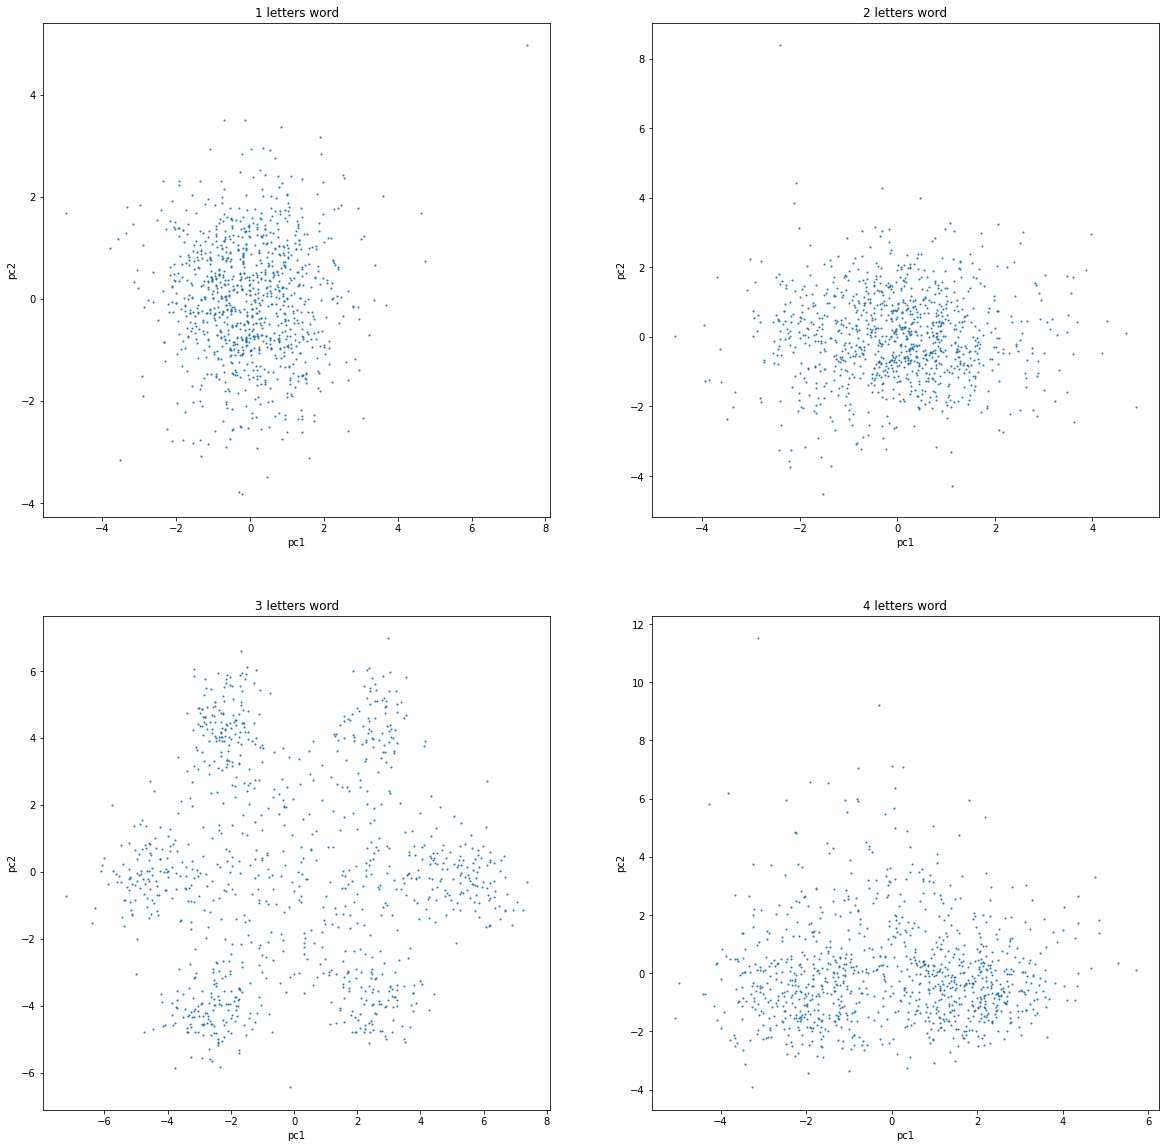

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

for i in range(1,5):
    plt.subplot(2,2,i)
    x = pCompTables[i].loc[:,'pc1']
    y = pCompTables[i].loc[:,'pc2']
    plt.scatter(x,y, s = 1)
    plt.xlabel('pc1')
    plt.ylabel('pc2')
    plt.title(str(i) + ' letters word')

plt.show()
    

From the plots we can clearly see that 3 letters generates identifiable visual relations between data points in the first two principal components

# K means clustering

We will now cluster the 3 letters word genes breakdown using k-means unsupervised algorithm. From the pictures above, we can detect 6 or 7 clusters. Knowing that some genes do not carry information, we are led to think that the center points, far from the 6 distinct centroids, could be a candidate for those. We therefore assume that there are 7 clusters (this could be checked by comparing performance of 6 or 7 clusterings)

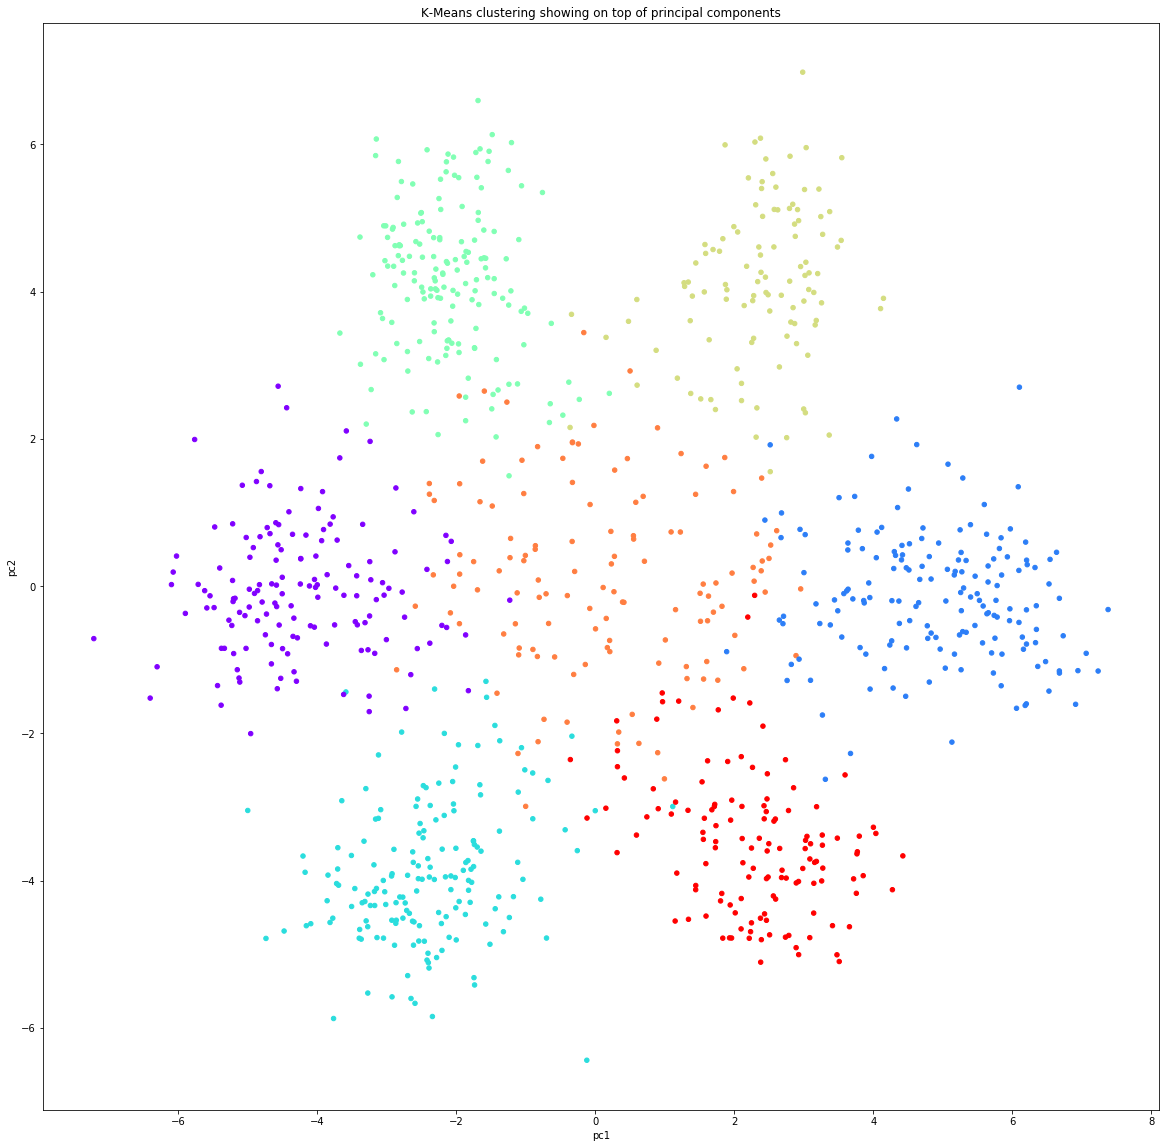

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 7)
kmeans.fit(normFreqTables[3])

plt.figure(figsize=(20,20))

x = pCompTables[3].loc[:,'pc1']
y = pCompTables[3].loc[:,'pc2']
plt.scatter(x,y, s = 20, c=kmeans.labels_, cmap = 'rainbow')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('K-Means clustering showing on top of principal components')

plt.show()